# Лабораторная работа 3 
Выполнил: Волков Вадим, Б01-007.
Исходный код [здесь](https://github.com/Volkov-Vad1m/ComputationalMath) 
## Ход работы
### Метод простой итерации
Выберем уравнение 12.4(л)  
$$x2^{x} -1 = 0$$  
Производная обращается в ноль в точке $$x = -1/{ln2}$$  
До этой точки функции убывает и отрицательна, после - возрастает. Следовательно, корень будет один  
Построим график:

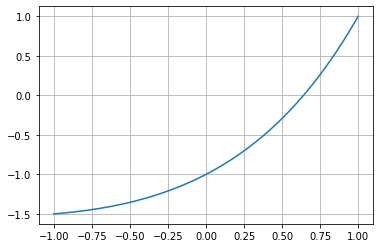

In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import math
EPSILON = 1E-5

def f(x):
    return x*pow(2,x) - 1

x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.grid()
plt.show()

Метод простой итерации: $$x_{n} = 2^{-x_{n-1}}$$  
Построим график:

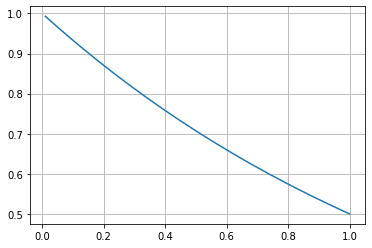

In [2]:
def phi(x):
    return pow(2, -x)

x = np.linspace (0.01, 1, 1000)
plt.plot(x, abs(phi(x)))
plt.grid()
plt.show()

За область локализации возьмём отрезок [0, 1]  
Метод поиска корня через МПИ:  

In [3]:
def msi(x_0):
    iters = 0
    x_cur = x_0
    x_prev = 0

    while(abs(x_cur - x_prev) > EPSILON):
        x_prev = x_cur
        
        x_cur = phi(x_prev)

        iters += 1
        
    return x_cur, iters

Результаты:

In [4]:
x, iters = msi(0.8)
print("Метод простой итерации")
print("x =", x)
print("iters =", iters)
print("Подставим корень в исходное уравнение")
print(f(x))

x = fsolve(f, 0.5)
print("Через fsolve")
print("x =", x[0])

Метод простой итерации
x = 0.6411875369990754
iters = 14
Подставим корень в исходное уравнение
4.0380590178301645e-06
Через fsolve
x = 0.641185744504986


### Метод Ньютона  
Выберем систему 12.5(г)  

$$F_1 = sin(x+2) - y - 1.5$$ 
$$F_2 = cos(y-2) + x - 0.5$$ 
По графику видно, что корень всего один.  

Матрица Якоби:  

$$\begin{equation*}
J = \left(
\begin{array}{cccc}
cos(x+2) & -1 \\
1 & -sin(y-2) 
\end{array}
\right)
\end{equation*}$$
Обратная матрица Якоби:  

$$\begin{equation*}
J^{-1} = \frac{1}{det}\left(
\begin{array}{cccc}
-sin(y-2)  & 1 \\
-1 & cos(x+2)
\end{array}
\right)
\end{equation*}$$
где   
$$det = -cos(x+2)sin(y-2) + 1$$

In [5]:
def F_1(x, y):
    return np.sin(x+2) - y - 1.5

def F_2(x, y):
    return np.cos(y-2) + x - 0.5
#сразу J^-1 * F
def revJ_mult_F(x,y):
    det = -np.sin(y-2)*np.cos(x+2) + 1
    row1 = (-np.sin(y - 2) * F_1(x,y) + F_2(x,y) ) / det
    row2 = (-F_1(x,y) + np.cos(x + 2) * F_2(x,y) ) / det
    return np.array([row1, row2])

def newton(x_0, y_0):
    iters = 0
    x_cur = x_0
    y_cur = y_0
    x_prev = 0
    y_prev = 0

    while((abs(x_cur - x_prev) > EPSILON) and (abs(y_cur - y_prev) > EPSILON)):
        x_prev = x_cur
        y_prev = y_cur
        

        arr = revJ_mult_F(x_prev, y_prev)
        x_cur = x_prev - arr[0]
        y_cur = y_prev - arr[1]

        iters += 1

    return x_cur, y_cur, iters


x, y, iters = newton(153232, -15312321)
print("Метод Ньютона")
print("x =", x)
print("y =", y)
print("iters =", iters)

print("Подставим корни в исходную систему")
print(F_1(x,y))
print(F_2(x,y))

Метод Ньютона
x = 1.3463376449191484
y = -1.703317484248414
iters = 107
Подставим корни в исходную систему
0.0
2.220446049250313e-16


Как мы видим, метод ньютона сработал при отдалённом начальном приближении.